# SVM with hyperparameter optimization

<p align="center">
  <img width="360" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg">
</p>

**Team members:**
*   López Escudero, Ramón
*   Morales Ruiz, Gabriel Alejandro
*   Moreno García, Adrián Homero
*   Suárez Hernández, Laura Fabiola

**Program:** M.Sc. in Data Science

**Course:** Convex Optimization

**Professor:** Juan Diego Sánchez Torres



# Introduction

Support Vector Machines \\

**Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

*   Effective in high dimensional spaces.
*   Still effective in cases where number of dimensions is greater than the number of samples.
*   Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
*   Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. [1]

The disadvantages of support vector machines include:

*  If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).


## Objectives
*   Create a minimum SVM model to predict on a dataset
*   Create an SVM model whose hyperparameters have been optimized using Bayesian Optimization.
*   Create an SVM model in which the optimization occurs in the data that will be fed into it.

## Expected apprenticeships
*   Implementation of a Bayesian Optimization with Gaussian Regression and an understanding of how it works.

# Theoretical Framework

## **Image Classification with Hyperparameter Bayesian Optimization**

In machine learning, Support vector machine(SVM) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. It is mostly used in classification problems. In this algorithm, each data item is plotted as a point in n-dimensional space (where **n** is the number of features), with the value of each feature being the value of a particular coordinate. Then, classification is performed by finding the hyper-plane that best differentiates the two classes (or more if we have a multi class problem).

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces (more specifically using the kernel trick, like the RBF funcion).

## Support Vector Machines

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. [3]

The most important question that arises when using a SVM is how to choose the correct hyperplane. Consider the following scenarios:


### Scenario 1

In this scenario there are three hyperplanes called A, B, and C. Now, the problem is to identify the hyperplane which best differentiates the stars and the circles.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_21-2.png" alt="what image shows"></center>

In this case, hyperplane B separates the stars and the circle betters, hence it is the correct hyperplane.


### Scenario 2

Now take another scenario where all three hyperplanes are segregating classes well. The question that arises is how to choose the best hyperplane in this situation.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/SVM_4-2.png" alt="what image shows"></center>

In such scenarios, we calculate the margin (which is the distance between nearest data point and the hyperplane). The hyperplane with the largest margin will be considered as the correct hyperplane to classify the dataset.

Here C has the largest margin. Hence, it is considered as the best hyperplane.

### Kernels
Knowing 
$$ w = \sum_{k=1}^{N} \alpha_k y_k \varphi(x_k) $$

And
$$ y_{pred} = w^T \varphi(x) + b $$

Then 
$$ y_{pred} = (\sum_{k=1}^{N} \alpha_k y_k \varphi(x_k))^T \varphi(x) + b $$

Where $\varphi$ is a function that makes each input in $x$ correspond to a point in $F$ (a Hilvert space). This can be seen as processing and transforming the input featuers to keep the model's convexity.

This also allows us to transform the inputs into another space where they might be more easily classified.

<center><img src=https://miro.medium.com/max/838/1*gXvhD4IomaC9Jb37tzDUVg.png alt="what image shows"></center>



## Bayesian Optimization

Bayesian Optimization is an approach that uses Bayes' Theorem to direct the search in order to find the minimum or maximum of an objective function.

Recall that Bayes Theorem is an approach for calculating the conditional probability of an event:

 $P(A \mid B)=\frac{P(B \mid A)^{*} P(A)}{P(B)}$

The conditional probability that we are calculating is referred to generally as the posterior probability; the reverse conditional probability is sometimes referred to as the likelihood, and the marginal probability is referred to as the prior probability; for example: \\
$\text { posterior }=\text { likelihood }^{*} \text { prior }$

This provides a framework that can be used to quantify the beliefs about an unknown objective function given samples from the domain and their evaluation via the objective function.

We can devise specific samples *(x1, x2, …, xn)* and evaluate them using the objective function f(xi) that returns the cost or outcome for the sample xi. Samples and their outcome are collected sequentially and define our data D, *e.g. D = {xi, f(xi), … xn, f(xn)} * and is used to define the prior. The likelihood function is defined as the probability of observing the data given the function P(D | f). This likelihood function will change as more observations are collected.

$P(f \mid D)=P(D \mid f)^{*} P(f)$

The posterior represents everything we know about the objective function. It is an approximation of the objective function and can be used to estimate the cost of different candidate samples that we may want to evaluate.

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=2f53c4bffbd7da94985f898087a891bfa5a86d87fcf1031129ad74e4425e1697
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


## ROC and AUC

A ROC (Receiver Operating Characteristic) is a graph that shows how the classification model performs at the classification thresholds. 

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

True Positive Rate is a synonym for recall and defined as:
$$ TPR = \frac{TP}{TP + FN} $$

False Positive Rate is defined as:

$$ FPR = \frac{FP}{FP + TN} $$

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

E.g. If you lower a classification threshold, more items would be classified as positive, increasing False Positives and True Positives.

AUC stands for Area under the ROC.


In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
import joblib
import skimage

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.base import BaseEstimator, TransformerMixin

from skimage.io import imread
from skimage.transform import resize
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from google.colab import drive

# Implementation

## Preparing the data set

The dataset that we will use can be found 

We define a function to read, resize and store the data in a dictionary, containing the images, labels (animal), original filenames, and a description. The images themselves are stored as numpy arrays containing their RGB values. The dictionary is saved to a pickle file using joblib. The data structure is based on that used for the test data sets in scikit-learn. [4]

In [ ]:
 def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# modify to fit your system
data_path = '/content/drive/MyDrive/Optimizacion_Convexa/Proyecto final/Image'
data_path

'/content/drive/MyDrive/Optimizacion_Convexa/Proyecto final/Image'

In [ ]:
os.listdir(data_path)

['BearHead',
 'EagleHead',
 'DogHead',
 'CowHead',
 'CatHead',
 'ElephantHead',
 'DuckHead',
 'HumanHead',
 'ChickenHead',
 'DeerHead',
 'LionHead',
 'PandaHead',
 'Natural',
 'TigerHead',
 'PigHead',
 'MonkeyHead',
 'PigeonHead',
 'SheepHead',
 'MouseHead',
 'RabbitHead',
 'WolfHead']


There are quite some animals included in the dataset, but we will only use the selection defined below. Also we set the width (and height) to 80 pixels.

In [ ]:
base_name = 'animal_faces'
width = 80
 
include = {'WolfHead', 'TigerHead', 'SheepHead', 
           'CatHead', 'LionHead', 'DeerHead', 'MouseHead','CowHead','DuckHead'}
# We apply the function defined at the begining 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


CowHead
CatHead
DuckHead
DeerHead
LionHead
TigerHead
SheepHead
MouseHead
WolfHead


Let’s load the data from disk and print a summary.



In [ ]:
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', (data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  972
keys:  dict_keys(['description', 'label', 'filename', 'data'])
description:  resized (80x80)animal images in rgb
image shape:  (80, 80, 3)
labels: ['Cat' 'Cow' 'Deer' 'Duck' 'Lion' 'Mouse' 'Sheep' 'Tiger' 'Wolf']


Counter({'Cat': 159,
         'Cow': 101,
         'Deer': 101,
         'Duck': 102,
         'Lion': 97,
         'Mouse': 100,
         'Sheep': 100,
         'Tiger': 112,
         'Wolf': 100})

The images below show an example of each animal included.



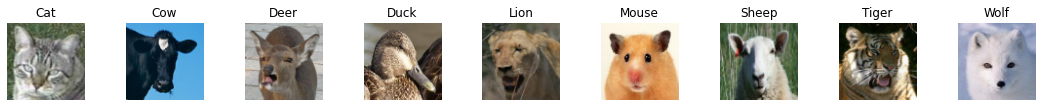

In [ ]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

By convention, we name the input data X and result (labels) y.



In [ ]:
X = np.array(data['data'])
y = np.array(data['label'])


Next, we need to split our data into a test set and a training set. We use the train_test_split function from scikit-learn and use 40% of the total set for training and the remaining for the test set. In the data set, the photos are ordered by animal, so we cannot simply split at 40%.

To understand why, let’s look at the table below. If the data is ordered and we split at some position, we will end up with some animals (types) appearing in only one of the two sets. For example, cows only appear in the test set. This is a problem, as in this way we will never train our model to recognise cows, and therefore it will not be able to predict them correctly.

We can solve this by shuffling the data prior to splitting. This way, we even out the distributions in the training and test set and make them comparable.

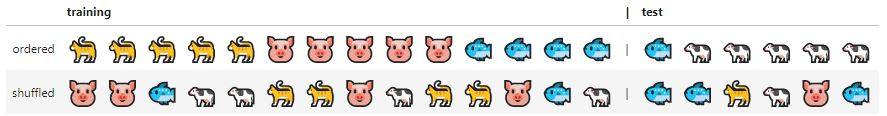

The train_test_split function in sklearn provides a shuffle parameter to take care of this while doing the split. The random_state seeds the shuffling so that it is random, but in a reproducible way. However we are going to use the stratify parameter.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y,
    train_size = 0.4
)

To verify that the distribution of photos in the training and test set is similar, let’s look at the relative number of photos per category.



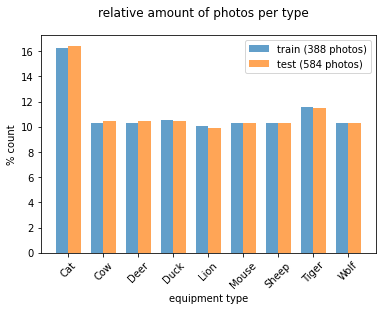

In [ ]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);


We used the stratify parameter of train_test_split to ensure equal distributions in the training and test set.
If we used the random state to select the images, it could have been splitted as follows: 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

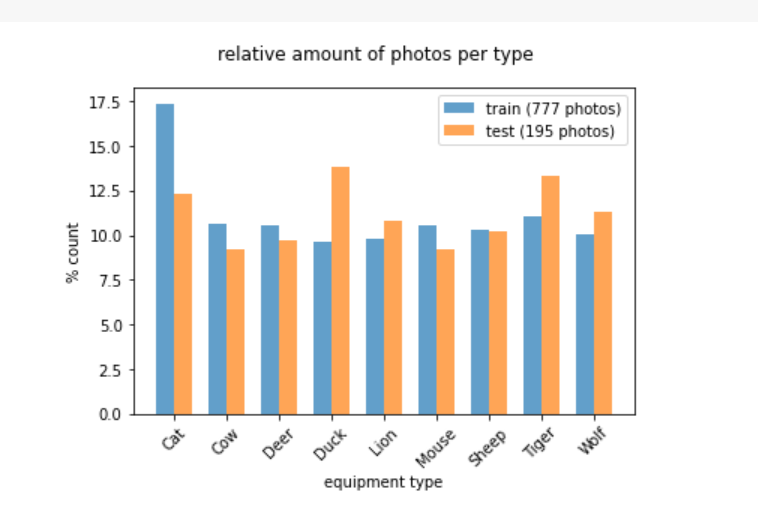

## Processing
A classic approach to object recognition is HOG-SVM, which stands for Histogram of Oriented Gradients and Support Vector Machines. HOGs are used for feature reduction, in other words: for lowering the complexity of the problem, while maintaining as much variation as possible.

To calculate a HOG, an image is divided into blocks, for example 8 by 8 pixels. For each of these blocks, the magnitude of the gradient in a given number of directions is calculated. 

The methodology we are going to use is divided in the following steps:

A) *Object detection*

B) *Preprocessing of the Sample Images*

C) *Feature Extraction using HOG Method*

HOG features descriptor is that local object appearance and shape within an image can be described by the distribution of density distribution of gradients. The implementation of this descriptor can be achieved by dividing the image into small regions called a cell. Each cell compiles a histogram of gradient direction for the pixel within the cell. HOG method has four steps to extract the object. First step is calculating the gradient values by applying $1-D$ centered to obtain the point of discrete derivative mask in horizontal and vertical direction as follow:
$$
\begin{array}{l}
D_{x}=\left[\begin{array}{lll}
-1 & 0 & 1
\end{array}\right] \\
D_{y}=\left[\begin{array}{r}
1 \\
0 \\
-1
\end{array}\right]
\end{array}
$$
If the object image is $I$, we can obtain $x$ and $y$ derivative using convolution operation:
$$
I_{x}=I_{x} * D_{x} \quad \text { and } \quad I_{y}=I_{y} * D_{y}
$$
For calculating the magnitude of gradient, the formula is
$$
|G|=\sqrt{I_{x}^{2}+I_{y}^{2}}
$$
and for gradient orientation is given by
$$
\theta=\arctan \frac{I_{y}}{I_{x}}
$$

The second step is spatial orientation binning. This step has a function to give a result of cell histogram by a voting process. Each pixel of the image within the casts a weighted vote for orientation in accordance with the closest bin in the range 0 to 180 degrees. In the third step, there is the $\mathrm{HOG}$ descriptor to normalize cell and histogram from entire block region to be a vector form. The last step, the block normalization is performed by using the $\mathrm{L} 2$ norm as follow:
$$
b=\frac{b}{\sqrt{|| b||^{2}+\varepsilon^{2}}}
$$

After process HOG normalization, the windows descriptor is needed to collect descriptor from all the block and change into vector form. In this research, we use the $64 \times 128$ pixels detection window. This detection window will be divided into 7 blocks across and 15 blocks vertically then the total of the block is 105 blocks. Each block contains 4 cells with a 9 -bin histogram for each cell and the total of value per block is 36 values. Because of this dimension, the final vector size of 7 blocks across $x 15$ blocks vertically $x 4$ cells per block $x 9$ bins per histogram $=3,780$ values. This final vector is accommodated by the database for the input in the next step in classifier process.

## Transformers
When calculating our HOG, we performed a transformation. We can transform our entire data set using transformers. These are objects that take in the array of data, transform each item and return the resulting data.

Here, we need to convert colour images to grayscale, calculate their HOGs and finally scale the data. For this, we use three transformers in a row: RGB2GrayTransformer, HOGTransformer and StandardScaler. The final result is an array with a HOG for every image in the input.

Scikit-learn comes with many built-in transformers, such as a StandardScaler to scale features and a Binarizer to map string features to numerical features. In addition, it provides the BaseEstimator and TransformerMixin classes to facilitate making your own Transformers.

A custom transformer can be made by inheriting from these two classes and implementing an __init__, fit and transform method. The TransformerMixin class provides the fit_transform method, which combines the fit and transform that we implemented.

Below, we define the RGB2GrayTransformer and HOGTransformer. [4]

In [ ]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

Note that for compatibility with scikit-learn, the fit and transform methods take both X and y as parameters, even though y is not used here.

With this, we are all set to preprocess our RGB images to scaled HOG features.

In [ ]:
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)


(388, 576)


## ROC and AUC

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

y_values_encoded = preprocessing.LabelEncoder().fit(y_test).transform(y_test)
y_binarize = label_binarize(y_values_encoded, classes=[i for i in set(y_values_encoded)])

def get_roc_auc(svm, X_test, y_test, labels=include) :
  y_encoded = preprocessing.LabelEncoder().fit(y_test).transform(y_test)
  y_bin = label_binarize(y_encoded, classes = [c for c in set(y_encoded)])

  y_score = svm.decision_function(X_test)
  n_classes = len(labels)
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarize[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  return y_bin, y_score, roc_auc, fpr, tpr

def micro_average_roc_auc(y_bin, y_score, u_roc_auc, fpr, tpr) :
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_binarize.ravel(), y_score.ravel())
  u_roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  return fpr, tpr, u_roc_auc

def plot_all_ROC_curves(fpr, tpr, labels = include) :
  n_classes = len(labels)
  lw=2
  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])
  # Finally average it and compute AUC
  mean_tpr /= n_classes
  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)
  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

def mean_auc_score(u_roc_auc) :
  model_score = np.array(list(u_roc_auc.values())).mean()
  return model_score


## Training SVM With No Optimization in the Hyperparameters

We generate an SVM model with an RBF kernel and using a regularization hyperparamter strictly positive equals to 0.5.

The RBF kernel function for two points X₁ and X₂ computes the similarity or how close they are to each other. This kernel can be mathematically represented as follows:

$K\left(X_{1}, X_{2}\right)=\exp \left(-\frac{\left\|X_{1}-X_{2}\right\|^{2}}{2}\right)$

where,

1. ' $\sigma$ ' is the variance and our hyperparameter
2. ||$X_{1}-X_{2}||$ is the Euclidean (L2-norm) Distance between two points $X_{1}$ and $\mathrm{X}_{2}$

In [ ]:
svm_clf = svm.SVC(kernel='rbf', C=0.5, class_weight="balanced")
svm_clf.fit(X_train_prepared, y_train)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Testing the Model

We transform the data using the method described above following these steps:
1. Convert to gray scale the images
2. Reduction of dimensions using the HOG model
3. Scale the data

In [ ]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

Next, we make a prediction for our test set and look at the results. How many of the predictions match with y_test?

In [ ]:
y_pred = svm_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:150])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True False  True False False  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True False  True  True False  True
  True False  True  True  True  True  True False  True False False  True
  True  True  True False  True  True  True False  True False  True False
  True  True  True  True False False]

Percentage correct:  75.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


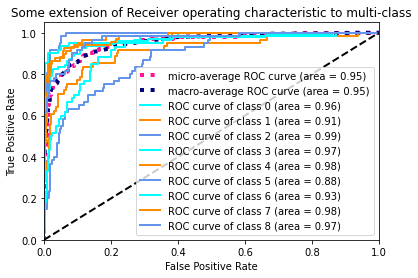

Base model score: 0.9522925128027694


In [ ]:
y_bin, y_score, roc_auc, fpr, tpr = get_roc_auc(svm_clf, X_test_prepared, y_test)
fpr, tpr, u_roc_auc = micro_average_roc_auc(y_bin, y_score, roc_auc, fpr, tpr)
plot_all_ROC_curves(fpr, tpr)
base_model_score = mean_auc_score(u_roc_auc)
print("Base model score: " + str(base_model_score))

## SVM With Bayessian Optimization
Hyperparameter optimization refers to performing a search in order to discover the set of specific model configuration arguments that result in the best performance of the model on a specific dataset.

Bayesian Optimization provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the surrogate function, that is then searched efficiently with an acquisition function before candidate samples are chosen for evaluation on the real objective function. [3]

### Automatically Tune Algorithm Hyperparameters
The benefit of these classes is that the search procedure is performed automatically, requiring minimal configuration.


In [ ]:
X_train.shape

(388, 80, 80, 3)

In [ ]:

print("Base model score: " + str(base_model_score))

def objective(c, gamma) :
  # Fit
  svm_clf = svm.SVC(kernel = "rbf", C = c, gamma = gamma, class_weight = "balanced")
  svm_clf.fit(X_train_prepared, y_train)

  # Get score
  y_bin, y_score, roc_auc, fpr, tpr = get_roc_auc(svm_clf, X_test_prepared, y_test)
  fpr, tpr, u_roc_auc = micro_average_roc_auc(y_bin, y_score, roc_auc, fpr, tpr)
  model_score = mean_auc_score(u_roc_auc)
  return model_score

hparams = {"c" : (0.05, 50),
           "gamma" : (0.000001, 0.0001)}


score = 0
best = None
for i in range(1) : 
    optimizer = BayesianOptimization(
        f = objective,
        pbounds = hparams
    )
    optimizer.maximize(n_iter=200)
    if optimizer.max["target"] > score :
        score = optimizer.max["target"]
        best = optimizer.max.copy()

Base model score: 0.9522925128027694
|   iter    |  target   |     c     |   gamma   |
-------------------------------------------------
|  1        |  0.9469   |  42.27    |  7.078e-0 |
|  2        |  0.9477   |  41.58    |  2.101e-0 |
|  3        |  0.9481   |  7.766    |  4.412e-0 |
|  4        |  0.9478   |  33.04    |  5.307e-0 |
|  5        |  0.9371   |  38.26    |  2.591e-0 |
|  6        |  0.8897   |  0.05     |  1.006e-0 |
|  7        |  0.9474   |  50.0     |  9.119e-0 |
|  8        |  0.8943   |  19.68    |  1.017e-0 |
|  9        |  0.9486   |  27.85    |  6.065e-0 |
|  10       |  0.9478   |  46.77    |  3.359e-0 |
|  11       |  0.9369   |  5.177    |  2.197e-0 |
|  12       |  0.9478   |  30.26    |  9.088e-0 |
|  13       |  0.9515   |  10.79    |  5.277e-0 |
|  14       |  0.9467   |  9.638    |  2.486e-0 |
|  15       |  0.9506   |  13.58    |  9.577e-0 |
|  16       |  0.9511   |  12.24    |  5.535e-0 |
|  17       |  0.9469   |  44.54    |  5.481e-0 |
|  18       |

### Testing the Model

In general, a model is skillful if it can demonstrate a performance that is better than a naive method, such as predicting the majority class in classification. This is called a baseline model or a baseline of performance that provides a relative measure of performance specific to a dataset. 

In this case, we can see that the model performed well achieving a mean classification accuracy of about **77** percent.

It is important to notice that both C and $\gamma$ were autotuned by the Bayesian process.


In [ ]:
svm_bayes = svm.SVC(kernel="rbf", C=optimizer.max["params"]["c"])
svm_bayes.fit(X_train_prepared, y_train)
y_pred_bayes = svm_bayes.predict(X_test_prepared)

print(np.array(y_pred_bayes == y_test)[:150])
print('')
print('Percentage correct: ', 100*np.sum(y_pred_bayes == y_test)/len(y_test))

[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
 False  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True False False  True False  True
  True  True  True  True  True  True  True False  True False False  True
  True  True  True  True  True  True  True  True  True  True False False
  True  True  True  True False False]

Percentage correct:  79.79452054794521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


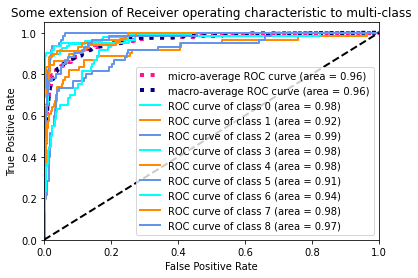

Base model score: 0.9608092328763718


In [ ]:
y_bin, y_score, roc_auc, fpr, tpr = get_roc_auc(svm_bayes, X_test_prepared, y_test)
fpr, tpr, u_roc_auc = micro_average_roc_auc(y_bin, y_score, roc_auc, fpr, tpr)
plot_all_ROC_curves(fpr, tpr)
bayes_model_score = mean_auc_score(u_roc_auc)
print("Base model score: " + str(bayes_model_score))

In [ ]:
print(u_roc_auc)

{0: 0.9799351092896175, 1: 0.920226937905526, 2: 0.991724916152086, 3: 0.9756449236748894, 4: 0.9769568637734365, 5: 0.9109732824427481, 6: 0.9387404580152672, 7: 0.9799936487773896, 8: 0.9714058524173028, 'micro': 0.9616342330878215, 'macro': 0.9616653361040045}


## Grid search
A huge advantage here is that, by using our pipeline, we can optimise both the transformations and the classifier in a single procedure. Additionally, instead of manually modifying parameters, we will use GridSearchCV. First we define a parameter grid, as shown in the cell below. [4]

Transformers and estimators are indicated by their name, such as ‘classify’. Their parameters are indicated by ‘name__parameter’. Our parameter grid consists of two dictionaries. In the first, we try to improve the HOGTransformer. In the second, we test SGD vs. SVM. GridSearchCV will check all combinations within each dictionary, so we will have, 2 * 2 * 3 + 2 = 14, in total. Since the optimal preprocessing can vary with the model, it is often a good idea to gridsearch them together to find the global optimum. So, a better grid would be one where the hogify and classify settings are varied together (by placing them in a single dictionary).

$y(x)=\sum_{n=1}^{N} a_{n} k k\left(x_{n} x_{m}\right)+b$

In [ ]:
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', svm.SVC(kernel='rbf', C=0.5))
])
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
    }
]

In [ ]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:  1.2min finished


Additionally, run grid_res.cv_results_  to a get a detailed log of the gridsearch. The output is not shown here, as it is quite long. To be able to retrieve this log in sklearn version 0.21 and up, the return_train_score argument of GridSearchCV must be set to True.

### Testing the model

In [ ]:
# the highscore during the search
print(grid_res.best_score_)

y_pred_grid = grid_res.predict(X_test)
print(np.array(y_pred_grid == y_test)[:150])
print('')
print('Percentage correct: ', 100*np.sum(y_pred_grid == y_test)/len(y_test))

0.6906976744186046
[ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True False False  True  True  True False  True  True  True  True False
  True  True  True False False False  True  True  True  True  True  True
  True False  True False  True  True  True  True  True  True  True False
 False False  True  True  True False  True False False  True  True  True
  True False  True  True  True  True False False  True False  True  True
 False  True  True  True  True  True False  True  True  True  True False
  True  True False  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True False  True False False]

Percentage correct:  74.48630136986301


# Interpretation

## Confusion matrix
A percentage like the above is nice, but it is not the whole story. What about false positives, for example? To get more insight in the results, we can use a correlation matrix. This is a table where each row corresponds to a label, and each column to a prediction. [2]



As we can see, correct predictions appear on the main diagonal, whereas all off-diagonal values correspond to incorrect classifications.

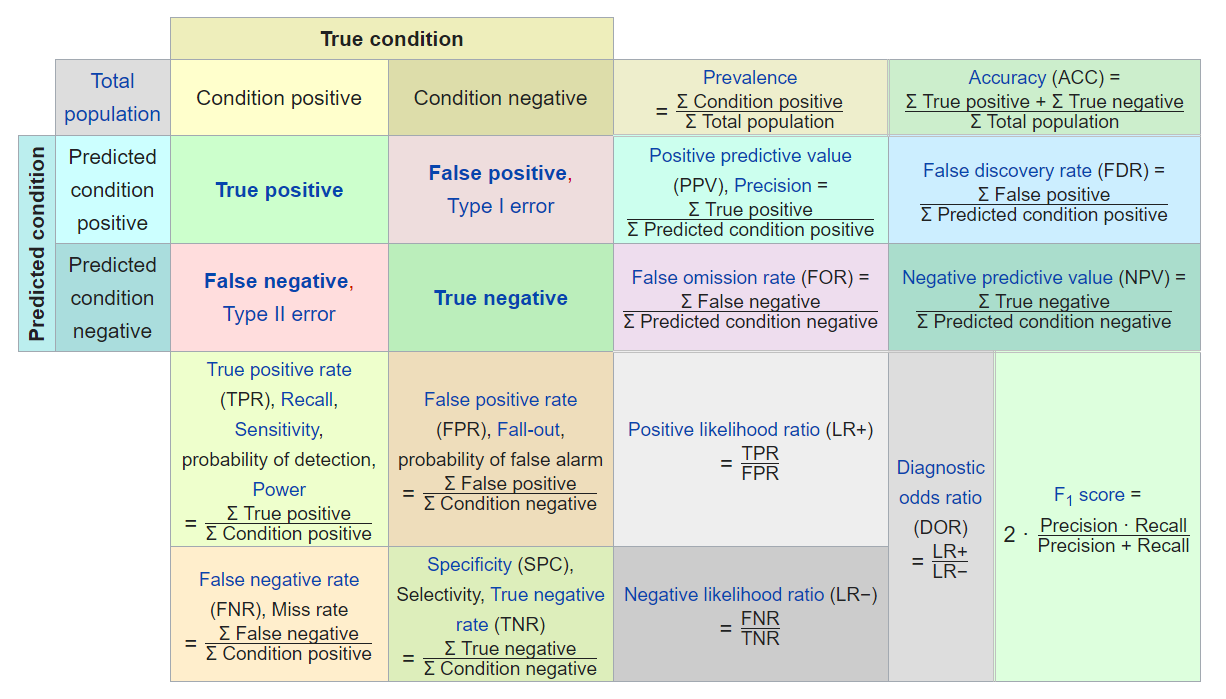

In [ ]:
cmx = confusion_matrix(y_test, y_pred)
cmx

array([[80,  0,  2,  3,  0,  7,  1,  0,  3],
       [ 3, 38,  5,  3,  0,  4,  8,  0,  0],
       [ 1,  2, 56,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  0, 55,  2,  1,  1,  1,  1],
       [ 0,  0,  0,  0, 50,  7,  0,  0,  1],
       [15,  1,  0,  3,  0, 37,  1,  0,  3],
       [ 5, 15,  5,  3,  0,  1, 30,  1,  0],
       [ 1,  0,  0,  2,  5, 11,  0, 47,  1],
       [ 4,  0,  2,  0,  4,  5,  0,  0, 45]])

In [ ]:
cmx_bayes = confusion_matrix(y_test, y_pred_bayes)
cmx_bayes

array([[88,  0,  2,  0,  0,  3,  1,  0,  2],
       [ 4, 37,  5,  1,  0,  2, 12,  0,  0],
       [ 1,  0, 57,  0,  0,  0,  3,  0,  0],
       [ 2,  0,  0, 55,  0,  1,  1,  1,  1],
       [ 1,  0,  0,  0, 49,  6,  0,  0,  2],
       [ 9,  1,  0,  3,  0, 44,  1,  1,  1],
       [ 4,  8,  6,  2,  0,  2, 37,  1,  0],
       [ 1,  0,  0,  0,  4,  7,  0, 54,  1],
       [ 4,  0,  2,  0,  5,  4,  0,  0, 45]])

In [ ]:
cmx_grid = confusion_matrix(y_test, y_pred_grid)
cmx_grid

array([[78,  0,  4,  6,  1,  2,  1,  1,  3],
       [ 5, 29,  8,  5,  0,  0,  9,  3,  2],
       [ 2,  2, 56,  0,  0,  0,  1,  0,  0],
       [ 0,  2,  0, 56,  0,  1,  0,  1,  1],
       [ 0,  1,  1,  2, 35,  2,  0, 10,  7],
       [ 4,  1,  2,  6,  4, 33,  4,  3,  3],
       [ 1,  8, 11,  6,  1,  0, 31,  2,  0],
       [ 1,  0,  1,  1,  3,  3,  0, 58,  0],
       [ 2,  0,  3,  1,  2,  1,  0,  0, 51]])

The largest values are on the diagonal, hence most predictions are correct, but there are mistakes (~15%). To visualise this more clearly as an image, we do two things. First, we normalise the matrix to 100, by dividing every value by the sum of its row (i.e. the number of actual items with a specific label). Then, we set the main diagonal to 0 in order to focus on the wrong predictions.

In [ ]:
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()

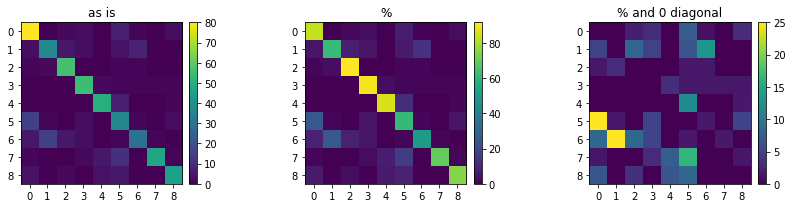

In [ ]:
plot_confusion_matrix(cmx)

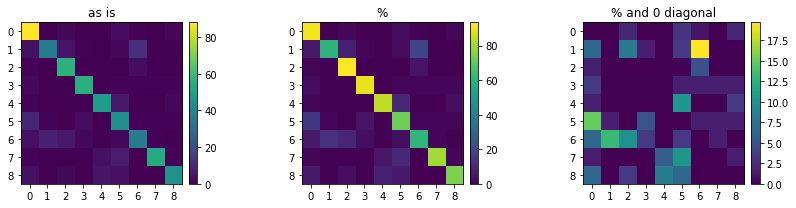

In [ ]:
plot_confusion_matrix(cmx_bayes)

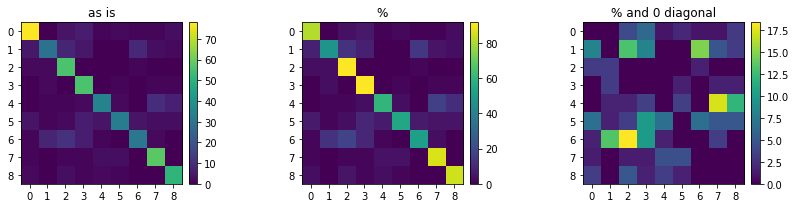

In [ ]:
plot_confusion_matrix(cmx_grid)

To draw proper conclusions, we often need to combine what we see in the confusion matrix with what we already know about the data. 

# Conclusions


Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system [5]:

*   .90-1 = *excellent (A)*
*   .80-.90 = *good (B)*
*   .70-.80 = *fair (C)*
*   .80-.90 = *good (B)*
*   .60-.70 = *poor (D)*
*   .50-.60 = *fail (F)* 

As a reference from below vector variable **u_roc_auc** we have the base model score for each class, 

\begin{array}{lll}
Class & Base\ Model\ Score & Accuracy\ Academic\ Point \\
0     & 0.95           & excellent (A)           \\
1     & 0.95           & excellent (A)           \\
2     & 0.99           & excellent (A)           \\
3     & 0.97           & excellent (A)           \\
4     & 0.98           & excellent (A)           \\
5     & 0.88           & excellent (A)           \\
6     & 0.93           & excellent (A)           \\
7     & 0.98           & excellent (A)           \\
8     & 0.97           & excellent (A)     
\end{array} 

After performing the Bayesian Optimization process, all AUCs for all classes jumped to above 0.90.

\begin{array}{lll}
Class & Opt\ Model\ Score & Accuracy\ Academic\ Point \\
0     & 0.9799           & excellent (A)           \\
1     & 0.9202           & excellent (A)           \\
2     & 0.9917           & excellent (A)           \\
3     & 0.9756           & excellent (A)           \\
4     & 0.9769           & excellent (A)           \\
5     & 0.9109           & excellent (A)           \\
6     & 0.9387           & excellent (A)           \\
7     & 0.9799           & excellent (A)           \\
8     & 0.9714           & excellent (A)           \\
micro & 0.9616           & excellent (A)           \\
macro & 0.9616           & excellent (A)          
\end{array} 

\\

Where it is observed that class *5*'s low score also reaches the excelent *(A) range*. This means this area measures discrimination, so this algorithm has the ability to correctly classify the images. Using Bayesian Optimization on the hyperparameters got us to the best separability and improved the SVM without the need to get into complex features transformations. 





# References
-   [1]  Shigeo Abe.Support Vector Machines for Pattern Classification,2Ed.Springer-Verlag London,2010.  ISBN978-1-84996-097-7.  URLhttps://www.springer.com/gp/book/9781849960977.

- [2]  Johan A K Suykens, Tony Van Gestel, Jos De Brabanter, BartDe Moor, and Joos Vandewalle.Least Squares Support VectorMachines.   World Scientific,2002.   ISBN9789812381514.   URLhttps://www.worldscientific.com/worldscibooks/10.1142/5089.

- [3]  Jake VanderPlas.Python Data Science Handbook.  O’Reilly Media,Inc.,2016.  ISBN9781491912058.  URLhttps://www.oreilly.com/library/view/python-data-science/9781491912126/.

- [4]  S. Boyd, S.P. Boyd, and L. Vandenberghe.Convex Optimization.Cambridge University Press,2004.  ISBN9780521833783.  URLhttps://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf.

- [5] Bradley, A. P. (1997). The use of the area under the ROC curve in the evaluation of machine learning algorithms. Pattern recognition, 30(7), 1145-1159. URL https://www.researchgate.net/post/how_can_I_interpret_the_ROC_curve_result
